In [1]:
#import model building libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten

In [3]:
from keras.preprocessing.image import ImageDataGenerator

In [4]:
#2.configure image data generator
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [5]:
#3.Apply image data generator functionality to train and test images
x_train=train_datagen.flow_from_directory(r'C:\Users\LalithaK\Downloads\vitamins_detection',target_size=(64,64),batch_size=32,class_mode='categorical')
x_test = test_datagen.flow_from_directory(r'C:\Users\LalithaK\Downloads\test_data',target_size = (64,64),batch_size = 32,class_mode = 'categorical')

Found 8968 images belonging to 5 classes.
Found 224 images belonging to 5 classes.


In [6]:
print(x_train.class_indices)

{'vitaminA': 0, 'vitaminB': 1, 'vitaminC': 2, 'vitaminD': 3, 'vitaminE': 4}


In [7]:
#2.initializing the model
model=Sequential()

In [8]:
#3.add convolution layer(no.of filters,size of filter,input shape)
model.add(Convolution2D(32,(3,3),input_shape=(64,64,3),activation="relu"))

In [9]:
#add max pool layer(pool_size)
model.add(MaxPooling2D(pool_size=(2,2)))

In [10]:
#add flatten layer  ---input of ann
model.add(Flatten())

In [11]:
#ann hidden layer
model.add(Dense(units=128,activation="relu"))

In [12]:
#add output layer
model.add(Dense(units=5,activation="softmax"))

In [13]:
#Compile the model (loss fucntion,accuracy,optimizer)
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics="accuracy")

In [14]:
#fit model (x_train,steps_per epoch,epochs,validation_data,validation_steps)
model.fit(x_train,steps_per_epoch=280,epochs=100,validation_data=x_test)

Epoch 1/100
280/280 [==============================] - 202s 718ms/step - loss: 1.4724 - accuracy: 0.4155 - val_loss: 1.1598 - val_accuracy: 0.5446
Epoch 2/100
280/280 [==============================] - 66s 237ms/step - loss: 1.2184 - accuracy: 0.5151 - val_loss: 1.0181 - val_accuracy: 0.5804
Epoch 3/100
280/280 [==============================] - 63s 226ms/step - loss: 1.1702 - accuracy: 0.5264 - val_loss: 1.0621 - val_accuracy: 0.5848
Epoch 4/100
280/280 [==============================] - 60s 213ms/step - loss: 1.1352 - accuracy: 0.5494 - val_loss: 0.9681 - val_accuracy: 0.6295
Epoch 5/100
280/280 [==============================] - 58s 208ms/step - loss: 1.1154 - accuracy: 0.5602 - val_loss: 1.0207 - val_accuracy: 0.5848
Epoch 6/100
280/280 [==============================] - 66s 234ms/step - loss: 1.1015 - accuracy: 0.5688 - val_loss: 0.9390 - val_accuracy: 0.6205
Epoch 7/100
280/280 [==============================] - 71s 254ms/step - loss: 1.0844 - accuracy: 0.5682 - val_loss: 0.9852 

Epoch 57/100
280/280 [==============================] - 47s 169ms/step - loss: 0.5611 - accuracy: 0.7905 - val_loss: 1.0592 - val_accuracy: 0.7098
Epoch 58/100
280/280 [==============================] - 47s 169ms/step - loss: 0.5738 - accuracy: 0.7827 - val_loss: 1.0043 - val_accuracy: 0.6830
Epoch 59/100
280/280 [==============================] - 46s 165ms/step - loss: 0.5771 - accuracy: 0.7802 - val_loss: 1.0451 - val_accuracy: 0.6696
Epoch 60/100
280/280 [==============================] - 47s 167ms/step - loss: 0.5528 - accuracy: 0.7892 - val_loss: 0.9008 - val_accuracy: 0.7143
Epoch 61/100
280/280 [==============================] - 47s 166ms/step - loss: 0.5595 - accuracy: 0.7884 - val_loss: 0.9725 - val_accuracy: 0.6964
Epoch 62/100
280/280 [==============================] - 47s 167ms/step - loss: 0.5654 - accuracy: 0.7846 - val_loss: 0.8575 - val_accuracy: 0.7277
Epoch 63/100
280/280 [==============================] - 48s 170ms/step - loss: 0.5519 - accuracy: 0.7908 - val_loss: 0

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 30752)             0         
                                                                 
 dense (Dense)               (None, 128)               3936384   
                                                                 
 dense_1 (Dense)             (None, 5)                 645       
                                                                 
Total params: 3937925 (15.02 MB)
Trainable params: 3937925 (15.02 MB)
Non-trainable params: 0 (0.00 Byte)
________________

In [16]:
#save our model
model.save("vitamins.h5")

C:\Users\LalithaK\anaconda3\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [17]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

In [18]:
import tensorflow as tf

In [19]:
model=tf.keras.models.load_model(r"C:\Users\LalithaK\Downloads\vitamins.h5",compile=False)

In [33]:
#D:\SmartBridge\VIT_morning_slot\dataset\Testing\elephants\nature_3306013__340.jpg
img=image.load_img(r"C:\Users\LalithaK\Downloads\tomato.jpeg",target_size=(64,64))

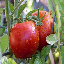

In [34]:
img

In [35]:
x=image.img_to_array(img)
x

array([[[ 88.,  74.,  71.],
        [ 93.,  77.,  87.],
        [103.,  89., 104.],
        ...,
        [152., 187.,  95.],
        [140., 174.,  80.],
        [129., 156.,  75.]],

       [[114., 111., 120.],
        [113., 102., 119.],
        [136., 119., 137.],
        ...,
        [143., 173., 119.],
        [140., 171., 103.],
        [125., 155.,  85.]],

       [[146., 149., 166.],
        [127., 117., 141.],
        [155., 132., 150.],
        ...,
        [113., 154.,  76.],
        [119., 156.,  79.],
        [124., 156.,  93.]],

       ...,

       [[194., 211., 221.],
        [195., 207., 223.],
        [224., 239., 218.],
        ...,
        [145., 176., 134.],
        [ 82., 121.,  76.],
        [ 74., 118.,  39.]],

       [[176., 195., 189.],
        [167., 182., 179.],
        [220., 238., 196.],
        ...,
        [140., 171., 130.],
        [ 83., 122.,  78.],
        [ 76., 120.,  43.]],

       [[192., 207., 236.],
        [151., 182., 112.],
        [152., 1

In [36]:
x=np.expand_dims(x,axis=0)

In [37]:
x.ndim

4

In [38]:
x.shape

(1, 64, 64, 3)

In [39]:
pred=model.predict(x)

1/1 [==============================] - 0s 52ms/step


In [40]:
pred

array([[0., 0., 1., 0., 0.]], dtype=float32)

In [41]:
pred_class=np.argmax(pred,axis=1)

In [42]:
pred_class[0]

2

In [43]:
index=['vitamin A', 'vitamin B', 'vitamin C', 'vitamin D','vitamin E']
result=str(index[pred_class[0]])

In [44]:
result

'vitamin C'